# ДОМАШНЕЕ ЗАДАНИЕ. PANDAS

Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

## Описание исходных данных

### TRAIN
row_id: (int64) — ID строки.

timestamp: (int64) — Время в милисекундах между началом выполнения задания и завершением.

user_id: (int32) — ID пользователя.

content_id: (int16) — ID вопроса.

content_type_id: (int8) — 0 — вопрос; 1 — просмотр лекции.

task_container_id: (int16) — ID блока вопросов или лекции (может включать в себя несколько content_id).

user_answer: (int8) ответ пользователя на вопрос, если таковой имеется. Считайте -1 как null, для лекций.

answered_correctly: (int8) — ответ пользователя на вопрос, -1 - пустое значение для лекций.

prior_question_elapsed_time: (float32) — среднее время в милисекундах, затраченное пользователем на ответы на предыдущий блок вопросов. Для первого значения — 0.

prior_question_had_explanation: (bool)— видел ли пользователь правильный ответ и объяснение на предыдущий блок вопросов (лекции в промежутке игнорируются). Для первого значения — 0. Обычно первые вопросы, которые видит пользователь - тест, на который не дается обратная связь

### QUESTIONS
question_id: внешний ключ для столбца train/test content_id, когда тип содержимого - вопрос (0).

bundle_id: код, для которого вопросы подаются вместе.

correct_answer: ответ на этот вопрос. Можно сравнить со столбцом train user_answer, чтобы проверить, был ли пользователь прав.

part: соответствующий раздел теста TOEIC.

tags: один или несколько подробных кодов тегов для вопроса. Значение тегов предоставлено не будет, но этих кодов достаточно для объединения вопросов воедино.

### LECTURES
lecture_id: внешний ключ для столбца train/test content_id, когда тип содержимого - лекция (1).

part: код категории верхнего уровня для лекции.

tag: один тег кодирует лекцию. Значение тегов не будет предоставлено, но этих кодов достаточно для объединения лекций воедино.

type_of: краткое описание основной цели лекции.

In [182]:
import pandas as pd
import matplotlib.pyplot as plt

## Train

In [183]:
train_data = pd.read_csv('train.csv',
                        usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                        dtype={ 'row_id': 'int32',
                                'timestamp': 'int32',
                                'user_id': 'int32',
                                'content_id': 'int16',
                                'content_type_id': 'int8',
                                'task_container_id': 'int16',
                                'user_answer': 'int8',
                                'answered_correctly':'int8',
                                'prior_question_elapsed_time': 'float32',
                                'prior_question_had_explanation': 'boolean'
                                },  
                        nrows=500000,
                        index_col=0                
                       )


Используем 500 000 строк для обработки данных

In [184]:
display(train_data)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...
499995,1440420636,9678259,3636,0,566,1,1,23000.0,True
499996,1440538419,9678259,9399,0,567,3,0,43000.0,True
499997,1782479847,9678259,5501,0,568,1,1,108000.0,True


In [185]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   timestamp                       500000 non-null  int32  
 1   user_id                         500000 non-null  int32  
 2   content_id                      500000 non-null  int16  
 3   content_type_id                 500000 non-null  int8   
 4   task_container_id               500000 non-null  int16  
 5   user_answer                     500000 non-null  int8   
 6   answered_correctly              500000 non-null  int8   
 7   prior_question_elapsed_time     488373 non-null  float32
 8   prior_question_had_explanation  498254 non-null  boolean
dtypes: boolean(1), float32(1), int16(2), int32(2), int8(3)
memory usage: 13.8 MB


In [186]:
train_data.shape

(500000, 9)

Подсчитываем колличестdо пропусков

In [187]:
train_data.isnull().sum()

timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                           0
answered_correctly                    0
prior_question_elapsed_time       11627
prior_question_had_explanation     1746
dtype: int64

In [188]:
pd.isnull(train_df).sum().sum()

247660

In [189]:
train_data.content_type_id.value_counts()

0    490119
1      9881
Name: content_type_id, dtype: int64

Выведем информацию о верных ответах на вопросы

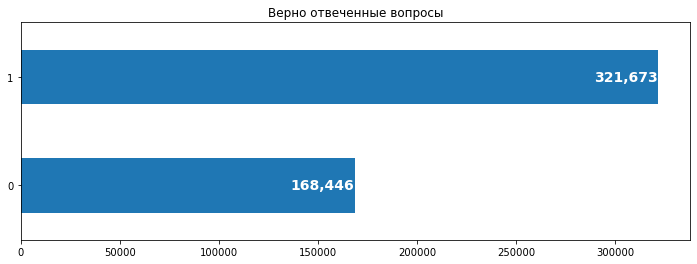

In [190]:
correct = train_data[train_data.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Верно отвеченные вопросы")
plt.xticks(rotation=0)
plt.show()

Выведем информаию о количестве правильных ответов

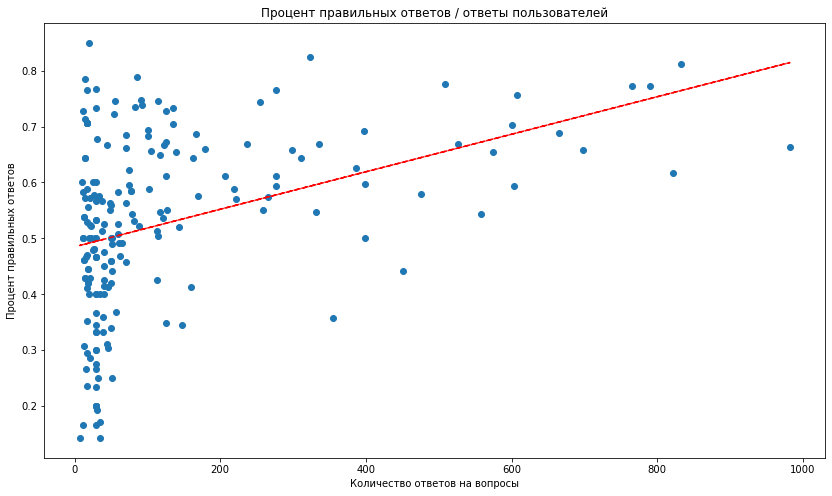

In [191]:
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(14,8))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Процент правильных ответов / ответы пользователей")
plt.xticks(rotation=0)
plt.xlabel("Количество ответов на вопросы")
plt.ylabel("Процент правильных ответов")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

## Questions

In [192]:
questions_data = pd.read_csv('questions.csv',                         
                        usecols=[0, 1, 2, 3, 4],
                           dtype={'question_id': 'int16',
                                  'part': 'int8',
                                  'bundle_id': 'int8',
                                  'correct_answer': 'int8',
                                  'tags': 'object'}
                          )

In [193]:
display(questions_data)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
...,...,...,...,...,...
13518,13518,-50,3,5,14
13519,13519,-49,3,5,8
13520,13520,-48,2,5,73
13521,13521,-47,0,5,125


In [194]:
questions_data.shape

(13523, 5)

## Соединим датафреймы

In [195]:
train_data = pd.merge(train_data, questions_data, left_on = 'content_id', right_on = 'question_id', how = 'left')

In [196]:
display(train_data)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,115,5692,0,1,3,1,NaN,<NA>,5692.0,60.0,3.0,5.0,151
1,56943,115,5716,0,2,2,1,37000.0,False,5716.0,84.0,2.0,5.0,168
2,118363,115,128,0,0,0,1,55000.0,False,128.0,-128.0,0.0,1.0,131 149 92
3,131167,115,7860,0,3,0,1,19000.0,False,7860.0,-76.0,0.0,1.0,131 104 81
4,137965,115,7922,0,4,1,1,11000.0,False,7922.0,-14.0,1.0,1.0,131 149 92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1440420636,9678259,3636,0,566,1,1,23000.0,True,3636.0,52.0,1.0,5.0,132
499996,1440538419,9678259,9399,0,567,3,0,43000.0,True,9399.0,-73.0,1.0,5.0,133
499997,1782479847,9678259,5501,0,568,1,1,108000.0,True,5501.0,125.0,1.0,5.0,89
499998,1782502151,9678259,4432,0,569,0,1,12000.0,True,4432.0,80.0,0.0,5.0,28


Оставим ответы и уберем пропуски

In [197]:
train_data = train_data[train_data.content_type_id == False] 
train_data = train_data[train_data.answered_correctly != -1 ]
train_data.drop(['content_type_id','question_id'], axis = 1, inplace = True)
train_data.dropna(inplace = True)
display(train_data)

,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,bundle_id,correct_answer,part,tags
1,56943,115,5716,2,2,1,37000.0,False,84.0,2.0,5.0,168
2,118363,115,128,0,0,1,55000.0,False,-128.0,0.0,1.0,131 149 92
3,131167,115,7860,3,0,1,19000.0,False,-76.0,0.0,1.0,131 104 81
4,137965,115,7922,4,1,1,11000.0,False,-14.0,1.0,1.0,131 149 92
5,157063,115,156,5,2,1,5000.0,False,-100.0,2.0,1.0,131 101 162 38
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1440420636,9678259,3636,566,1,1,23000.0,True,52.0,1.0,5.0,132
499996,1440538419,9678259,9399,567,3,0,43000.0,True,-73.0,1.0,5.0,133
499997,1782479847,9678259,5501,568,1,1,108000.0,True,125.0,1.0,5.0,89
499998,1782502151,9678259,4432,569,0,1,12000.0,True,80.0,0.0,5.0,28


Количество правильных/неправильных ответов

In [198]:
train_data.answered_correctly.value_counts()

1    320452
0    167921
Name: answered_correctly, dtype: int64

Как отвечали на вопросы content_id

In [199]:
how_answer_questions = train_data[['content_id', 'answered_correctly']].groupby(['content_id']).agg(['mean'])
how_answer_questions.columns = ["answered_correctly_content_mean"]
how_answer_questions

,answered_correctly_content_mean
content_id,
0,0.871795
1,0.923077
2,0.551220
3,0.782609
4,0.595890
...,...
13518,0.666667
13519,0.428571
13520,0.714286


In [200]:
how_answer_questions['part'] = train_data.part
how_answer_questions.sort_values(by=['answered_correctly_content_mean'], ascending = False)

,answered_correctly_content_mean,part
content_id,,
11600,1.0,3.0
11797,1.0,1.0
12981,1.0,3.0
12982,1.0,3.0
11834,1.0,3.0
...,...,...
12385,0.0,7.0
12386,0.0,7.0
12387,0.0,6.0


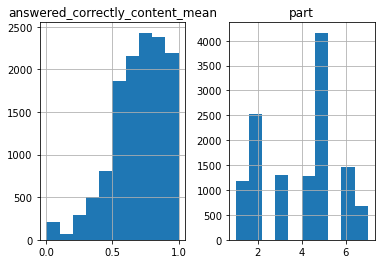

In [201]:
how_answer_questions.hist();

Рассмотрим по user_id

In [202]:
user_book = train_df[['user_id','answered_correctly']].groupby(['user_id']).agg(['mean', 'sum', 'count'])
user_book.columns = ["answered_correctly_user_mean", 'sum_correct', 'count']
user_book.sort_values(by=['count'], ascending = False)
user_book

,answered_correctly_user_mean,sum_correct,count
user_id,,,
115,0.695652,32.0,46
124,0.233333,7.0,30
2746,0.500000,10.0,20
5382,0.632812,81.0,128
8623,0.598214,67.0,112
...,...,...,...
196087402,0.357143,5.0,14
196112832,0.764706,13.0,17
196116047,0.576923,15.0,26


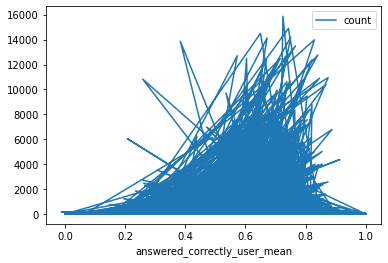

In [203]:
user_book.plot(y='count', x = 'answered_correctly_user_mean');

In [204]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488373 entries, 1 to 499999
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   timestamp                       488373 non-null  int32  
 1   user_id                         488373 non-null  int32  
 2   content_id                      488373 non-null  int16  
 3   task_container_id               488373 non-null  int16  
 4   user_answer                     488373 non-null  int8   
 5   answered_correctly              488373 non-null  int8   
 6   prior_question_elapsed_time     488373 non-null  float32
 7   prior_question_had_explanation  488373 non-null  boolean
 8   bundle_id                       488373 non-null  float64
 9   correct_answer                  488373 non-null  float64
 10  part                            488373 non-null  float64
 11  tags                            488373 non-null  object 
dtypes: boolean(1), f

Квантили тестов

In [205]:
print('квантили 0.25: доли хороших тестов =', user_book['answered_correctly_user_mean'].quantile( 0.25 ))
print('квантили 0.5: доли хороших тестов =', user_book['answered_correctly_user_mean'].quantile( 0.5 ))
print('квантили 0.75: доли хороших тестов =', user_book['answered_correctly_user_mean'].quantile( 0.75 ))

квантили 0.25: доли хороших тестов = 0.4230769230769231
квантили 0.5: доли хороших тестов = 0.55
квантили 0.75: доли хороших тестов = 0.6474748701535296


## Lectures 

In [206]:
lectures_data = pd.read_csv('lectures.csv', sep=',')
lectures_data

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
...,...,...,...,...
413,32535,8,5,solving question
414,32570,113,3,solving question
415,32604,24,6,concept
416,32625,142,2,concept


In [207]:
lectures_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


В датафрейме 418 различных лекций

In [208]:
lectures_data.shape

(418, 4)

Выведем различные типы лекций

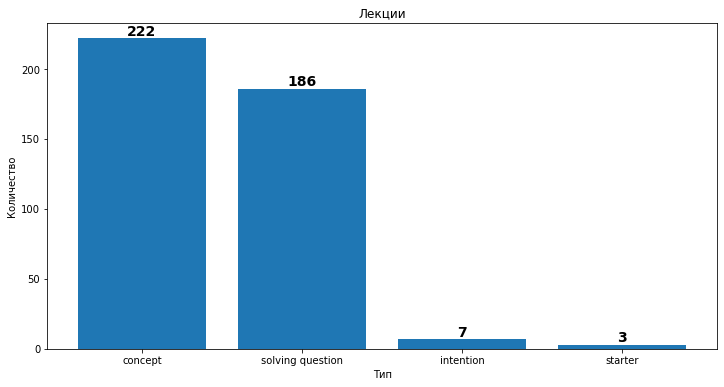

In [209]:
lect_type_of = lectures_data.type_of.value_counts()

fig = plt.figure(figsize=(12,6))
plt.bar(lect_type_of.index, lect_type_of.values)
for i, v in zip(lect_type_of.index, lect_type_of.values):
    plt.text(i, v, v, color='black', fontweight='bold', fontsize=14, va='bottom', ha='center')
plt.title("Лекции")
plt.xlabel("Тип")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()